<a href="https://colab.research.google.com/github/zbrutko/Astro-1221/blob/main/Milky_Way_Bulge_Project_Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy.constants as const # we import astronomy constants, like the Gravitational Constant
import astropy.units as u # we import astronomy units, like the mass of the Sun
import numpy as np # we import numpy to be able to use mathematical operations

In [2]:
import matplotlib.pyplot as plt #tools are imported to allow for the plotting of graphs

In [3]:
def calculate_orbital_velocity(M, R): #Calculate the orbital velocity of a planet given its mass and radius. Output orbital velocity
  v = np.sqrt(const.G * M / R)
  v.to(u.km/u.s)
  return(v)

In [4]:
M_buldge = 1e10 * u.solMass #define buldge mass in terms of solar masses

In [5]:
R_arr = np.arange(1, 30) * u.kpc # Define a range of orbital radius in kilo parsec
v_arr = calculate_orbital_velocity(M_buldge, R_arr)
print(v_arr.to(u.km/u.s)) # When in doubt, print them out!
#

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


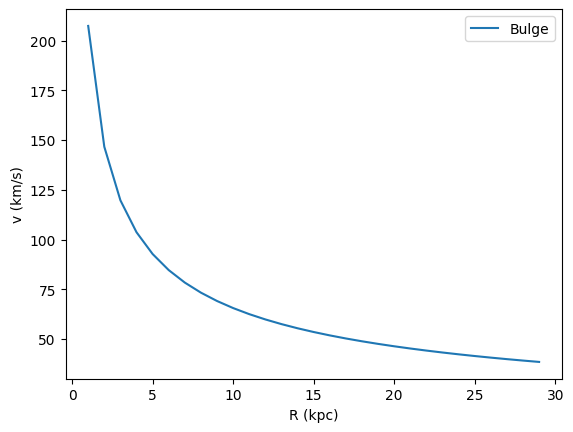

In [6]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
# The combination of labels and legend will come handy to show differnt curves in a plot as shown in future figures.
plt.show()
#

We will now add the disk component, which must be added by making a function to define enclosed mass and using that function to find orbital velocity.

In [7]:
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

318.3098861837907 1e+06 solMass / kpc2


In [8]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)


In [9]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [10]:
v_buldge_arr = calculate_orbital_velocity(M_buldge, R_arr) #This is the same as before, new name

In [11]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_arr)
v_bulge_disk_arr = calculate_orbital_velocity(M_total, R_arr)

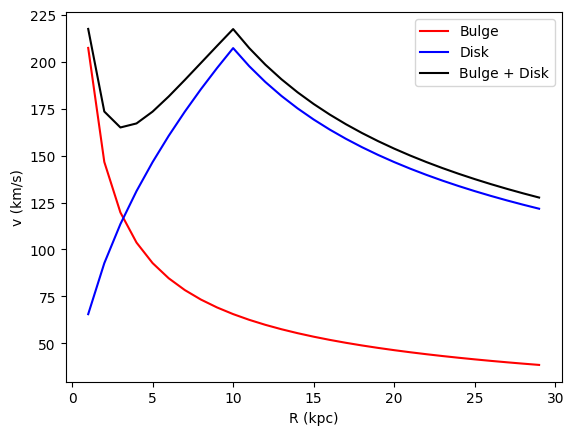

In [12]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

We will now add the halo component, which can be added similarly to the disk component

In [13]:
M_halo = 1e12 * u.solMass # Define halo total mass
R_halo = 39.5 * u.kpc # Define the outer edge of halo radius
density_halo = M_halo / (np.pi * (R_halo**3)* (4/3)) # here the density is in the unit of solar mass per cubed kpc
print(density_halo)

3873647.5554727805 solMass / kpc3


In [14]:
def calculatingEnclosedMassForHalo(R, density= density_halo):
    """
    Calculate enclosed mass for the halo component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 39.5 * u.kpc:
        M = np.pi * (R**3) * (4/3) * density

    else:
        R = 39.5 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**3) * (4/3) * density

    return(M)

In [39]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/(u.kpc**2), M_bulge = 1e10 * u.solMass, density_halo = 3873647.5554727805 * u.solMass/(u.kpc**3)):
    """
    This is a function that returns the total enclosed mass of the Milky Way, now including the halo component
    """
    M_buldge = 1e10 * u.solMass
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk) * 1.3
    M_halo = calculatingEnclosedMassForHalo(R, density=density_halo)
    M_total = M_disk + M_bulge + M_halo
    return(M_total)

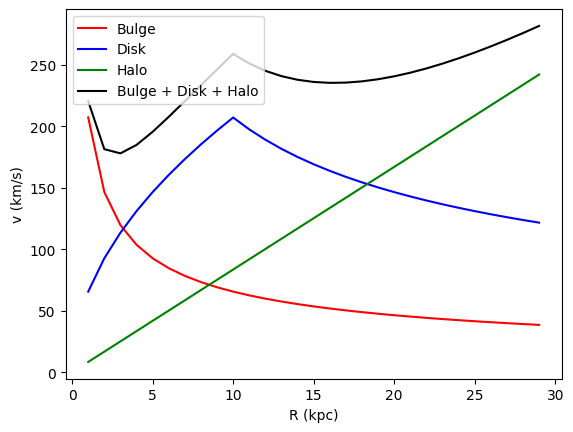

In [41]:
# Define arrays to be calculated
v_buldge_arr = calculate_orbital_velocity(M_buldge, R_arr) #This is the same as before, new name

M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_halo = np.zeros(len(R_arr)) * u.solMass
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk, halo, and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk.to(u.kg), R_arr.to(u.m))
v_halo_arr = calculate_orbital_velocity(M_halo.to(u.kg), R_arr.to(u.m))
v_bulge_disk_halo_arr = calculate_orbital_velocity(M_total.to(u.kg), R_arr.to(u.m))

# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

Data points are now added to the graph to compare our model to true rotational data points in the Milky Way.

In [17]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006 (1).txt to galaxy_rotation_2006 (1).txt


In [20]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006 (1).txt")

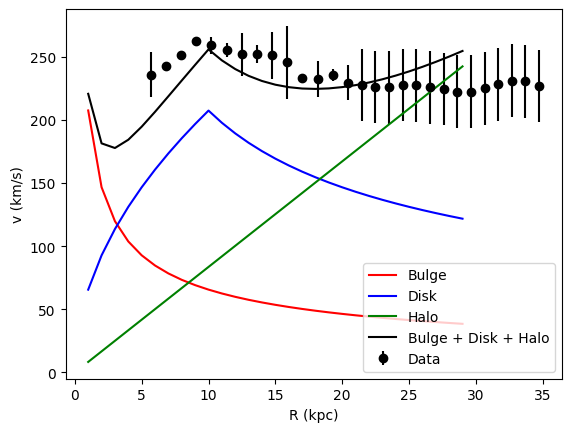

In [40]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()